In [1]:
import pandas as pd

dataset = pd.read_csv('./SupplyChain.csv',encoding='unicode_escape')#自动忽略编码格式
print(dataset.shape) #共18万行，53列
dataset

(180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [2]:
dataset.isnull().sum()#判断各列是否有缺失值

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [3]:
#筛选出来有缺失值的
temp = dataset.isnull().sum()
temp[temp >0] #在考虑特征提取的时候像前两个只有少量的缺失值可以考虑补全，但是像后两个绝大部分都是缺失值，可以考虑不要这两个字段

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [4]:
#将firstname 与 lastname进行合并
dataset['Customer fullname'] = dataset['Customer Fname'] + dataset['Customer Lname'] 

In [5]:
dataset[['Customer Fname','Customer Lname','Customer fullname']]

,Customer Fname,Customer Lname,Customer fullname
0,Cally,Holloway,CallyHolloway
1,Irene,Luna,IreneLuna
2,Gillian,Maldonado,GillianMaldonado
3,Tana,Tate,TanaTate
4,Orli,Hendricks,OrliHendricks
...,...,...,...
180514,Maria,Peterson,MariaPeterson
180515,Ronald,Clark,RonaldClark
180516,John,Smith,JohnSmith
180517,Mary,Smith,MarySmith


In [6]:
#将Customer Zipcode列的缺失值用0补全
print(dataset['Customer Zipcode'].value_counts())
print(dataset['Customer Zipcode'].isnull().sum())
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)
print(dataset['Customer Zipcode'].isnull().sum())

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64
3
0


<AxesSubplot:>

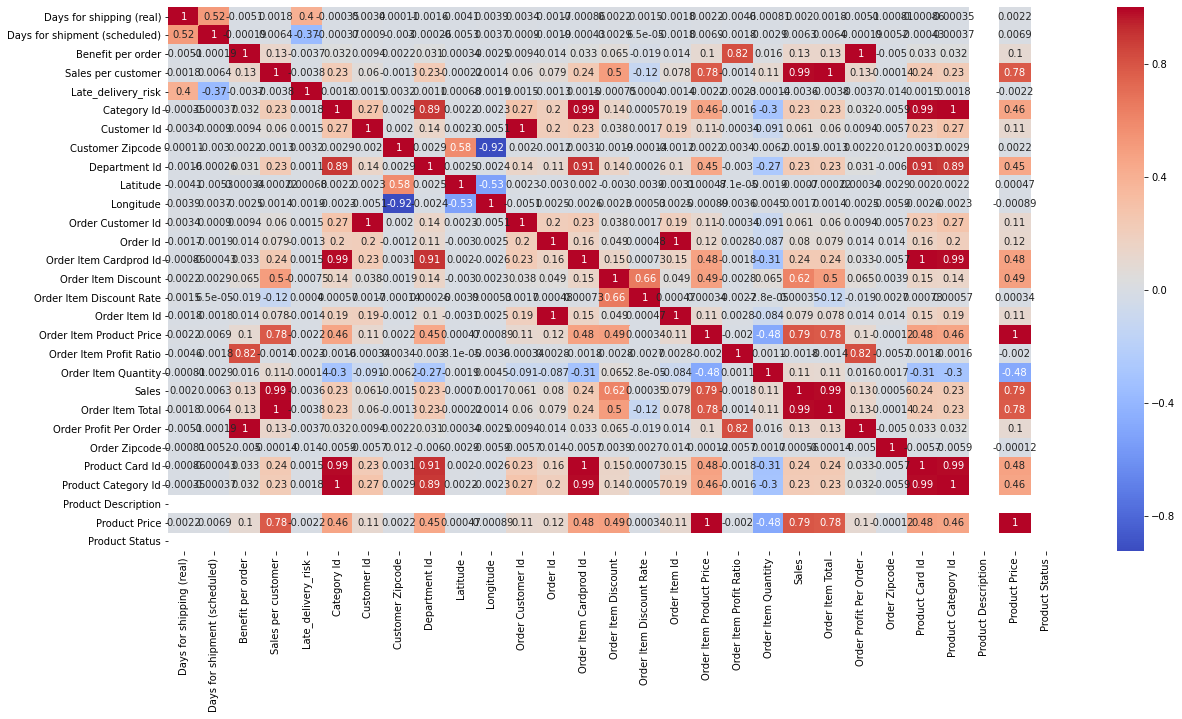

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#特征字段之间的相关性
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)#可见除了对角线是自己的相关性为一以外，还有一些字段的相关性也比较高，所以取其中一个即可

<AxesSubplot:title={'center':'Sales in different Market'}, xlabel='Market'>

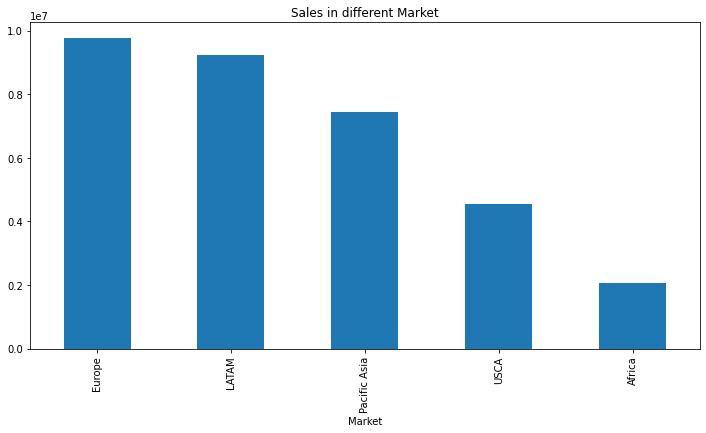

In [9]:
#按照不同的market，order Region
#基于market
market = dataset.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different Market')

<AxesSubplot:title={'center':'Sales in different Order Region'}, xlabel='Order Region'>

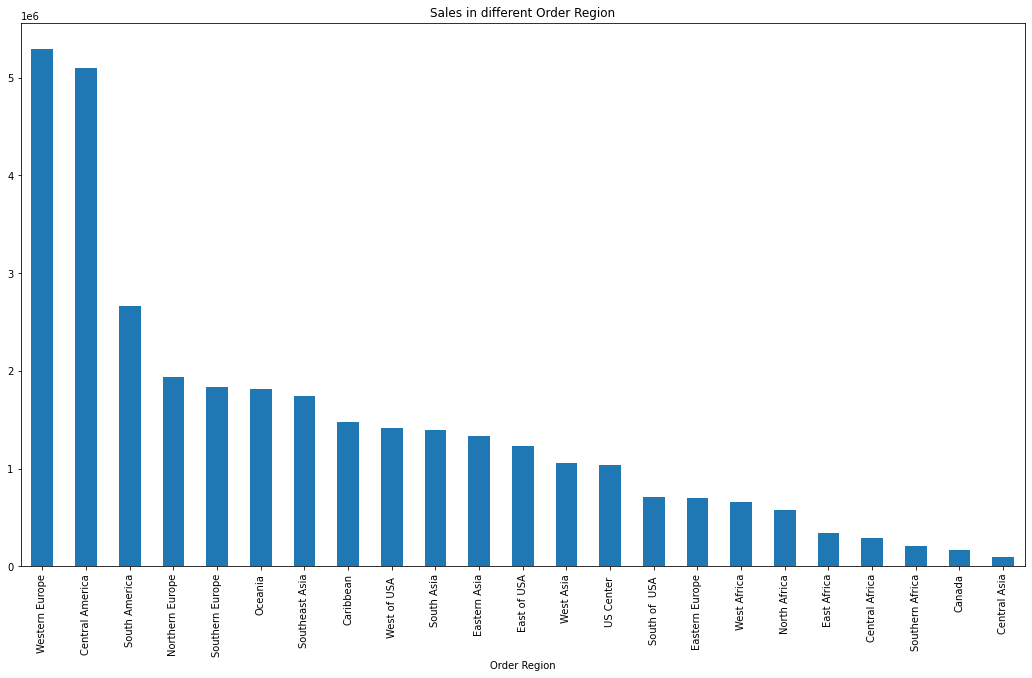

In [10]:
#基于order Region
Region = dataset.groupby('Order Region')
Region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(18,10),title='Sales in different Order Region')

<AxesSubplot:title={'center':'Sales in different  Category Name'}, xlabel='Category Name'>

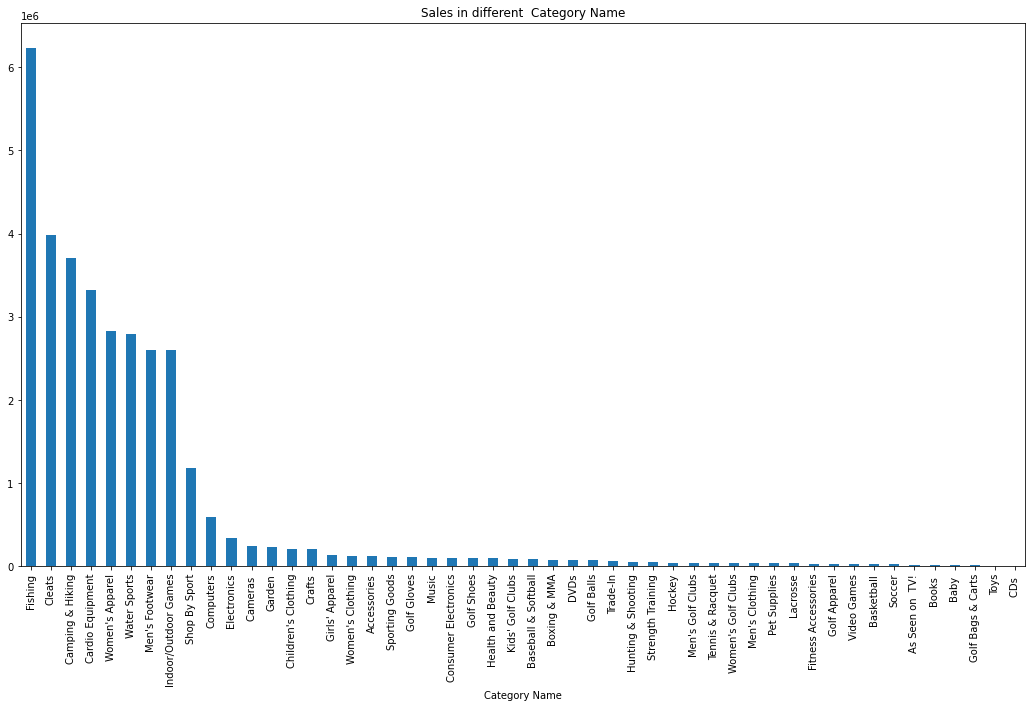

In [11]:
#按照不同的Category Name
cat = dataset.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(18,10),title='Sales in different  Category Name')

In [12]:
#按照不同的时间维度（年，月，星期，小时）的趋势
#创建时间戳，首先将元数据转换成时间戳格式方便运算
temp = pd.DatetimeIndex(dataset['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [13]:
dataset['order_year'] = temp.year  #年
dataset['order_month'] = temp.month #月
dataset['order_week_day'] = temp.weekday#星期
dataset['order_hour'] = temp.hour#小时
dataset['order_month_year'] = temp.to_period('M')#年月组合   #到月为止
dataset[['order_year','order_month','order_week_day','order_hour','order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


<AxesSubplot:title={'center':'Sales in different order_month'}, xlabel='order_month'>

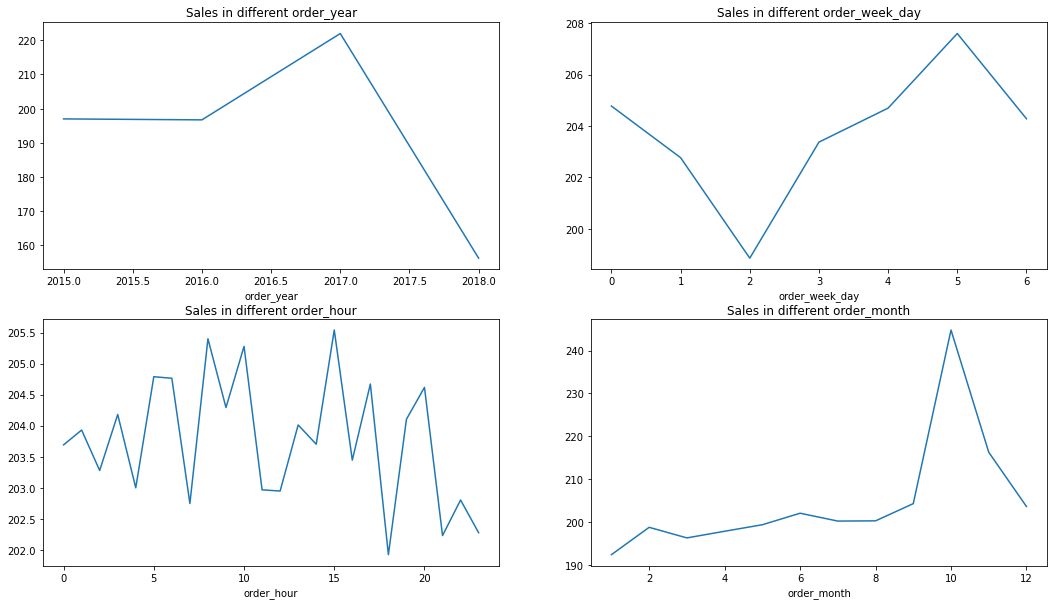

In [14]:
#对销售额，按照不同时间维度进行探索
plt.subplot(2,2,1)
dfyear = dataset.groupby('order_year')
dfyear['Sales'].mean().plot(figsize=(18,10),title='Sales in different order_year')

plt.subplot(2,2,2)
dfyear = dataset.groupby('order_week_day')
dfyear['Sales'].mean().plot(figsize=(18,10),title='Sales in different order_week_day')

plt.subplot(2,2,3)
dfyear = dataset.groupby('order_hour')
dfyear['Sales'].mean().plot(figsize=(18,10),title='Sales in different order_hour')


plt.subplot(2,2,4)
dfyear = dataset.groupby('order_month')
dfyear['Sales'].mean().plot(figsize=(18,10),title='Sales in different order_month')

<AxesSubplot:xlabel='Product Price'>

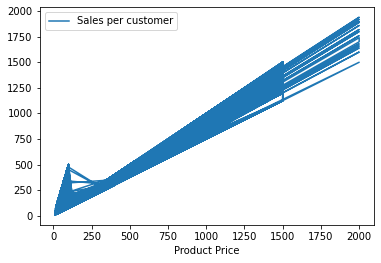

In [15]:
# Product Price与Sales per customer 相关性如何
#plt.figure(figsize=(20,10))
dataset.plot(x='Product Price',y='Sales per customer')

In [18]:
data = dataset 
#时间类型转换，因order date (DateOrders)字段原格式不为事件类型，无法进行有效统计，所以先转换成为事件类型
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)'].max()#检查  转换为时间格式后，统计正确

Timestamp('2018-01-31 23:38:00')

In [19]:
# #假设今天时间为2018-02-01
import  datetime
present = datetime.datetime(2018,2,1)
present

datetime.datetime(2018, 2, 1, 0, 0)

In [20]:
#计算每个用户rfm指标（按照Order Customer Id进行维度统计，因可能一个用户存在多笔订单）
customer_set = data.groupby('Order Customer Id').agg({'order date (DateOrders)':lambda x :(present-x.max()).days,'Order Id': lambda x:len(x),'Sales':lambda x:x.sum()})
customer_set

,order date (DateOrders),Order Id,Sales
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [23]:
#转换为[1,4]
#Recency，最近一次消费时间间隔 ,这个值越小代表消费时间越近，R_score评分应该越高
def  R_score(a,b,c):
    if a <=c[b][0.25]:
        return 4
    if a <=c[b][0.50]:
        return 3
    if a <=c[b][0.75]:
        return 2
    return 1

#Frequency，Monetary   消费频率，消费金额  越大越好
def FM_score(a,b,c) :
    if a <= c[b][0.25]:
        return 1
    if a <= c[b][0.50]:
        return 2
    if a <= c[b][0.75]:
        return 3
    return 4



In [26]:
#	order date (DateOrders)	Order Id	Sales
#将字段名称改成R_value,F_value,M_value
customer_set.rename(columns={'order date (DateOrders)':'R_value',
                             'Order Id':'F_value',
                             'Sales':'M_value'
                             },inplace=True)
customer_set

,R_value,F_value,M_value
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [29]:
#将rfm数据划分为4个尺度
quantiles = customer_set.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [31]:
#新建R_Score 用于将R_value =>[1,4]
customer_set['R_Score'] = customer_set['R_value'].apply(R_score,args=('R_value',quantiles))
customer_set['F_Score'] = customer_set['F_value'].apply(FM_score,args=('F_value',quantiles))
customer_set['M_Score'] = customer_set['M_value'].apply(FM_score,args=('M_value',quantiles))
customer_set

,R_value,F_value,M_value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,499.950012,1,1,2
2,136,10,1819.730034,3,3,3
3,229,18,3537.680094,2,4,4
4,380,14,1719.630030,1,3,3
5,457,7,1274.750023,1,2,2
...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1
20754,0,1,215.820007,4,1,1
20755,0,1,327.750000,4,1,2


In [34]:
#计算RFM用户分层
def RFM_User(df):
    if df['R_Score'] >2 and df['F_Score'] >2 and df['M_Score'] >2 :
        return '重要价值用户'
    if df['R_Score'] >2 and df['F_Score'] <=2 and df['M_Score'] >2 :
        return '重要发展用户'
    if df['R_Score'] >2 and df['F_Score'] >2 and df['M_Score'] <=2 :
        return '重要保持用户'
    if df['R_Score'] >2 and df['F_Score'] <=2 and df['M_Score'] <=2 :
        return '重要挽留用户'
    if df['R_Score'] <=2 and df['F_Score'] >2 and df['M_Score'] >2 :
        return '一般价值用户'
    if df['R_Score'] <=2 and df['F_Score'] <=2 and df['M_Score'] >2 :
        return '一般发展用户'
    if df['R_Score'] <=2 and df['F_Score'] >2 and df['M_Score'] <=2 :
        return '一般保持用户'
    if df['R_Score'] <=2 and df['F_Score'] <=2 and df['M_Score'] <=2 :
        return '一般挽留用户'


In [35]:
#定义用户分类字段，计算用户分类层级
customer_set['Customer_Segmentation'] = customer_set.apply(RFM_User,axis=1)
customer_set

,R_value,F_value,M_value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,792,1,499.950012,1,1,2,一般挽留用户
2,136,10,1819.730034,3,3,3,重要价值用户
3,229,18,3537.680094,2,4,4,一般价值用户
4,380,14,1719.630030,1,3,3,一般价值用户
5,457,7,1274.750023,1,2,2,一般挽留用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1,重要挽留用户
20754,0,1,215.820007,4,1,1,重要挽留用户
20755,0,1,327.750000,4,1,2,重要挽留用户
